In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r"C:\Users\Hp\Desktop\ICT\data set\titanic_dataset (1).csv")

In [322]:
import warnings
warnings.filterwarnings('ignore')

In [323]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [324]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [325]:
data.shape

(891, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

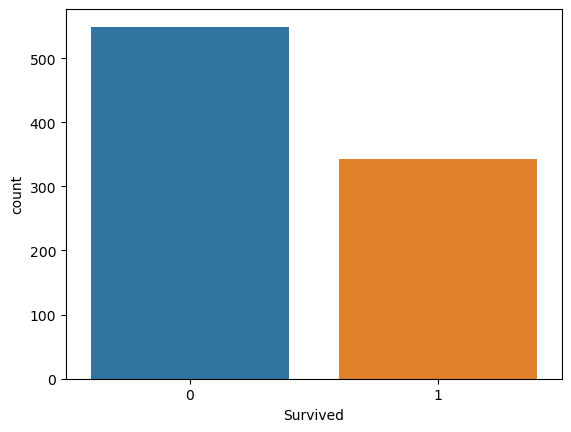

In [326]:
sns.countplot('Survived',data=data)
plt.show

In [327]:
survivalcount = data.groupby('Survived').size()
survivalproportion = survival_counts / data.shape[0]

In [328]:
survivalproportion

Survived
0    0.616162
1    0.383838
dtype: float64

In [329]:
# From the above graph shows that there not many persons survived. Out of 891 persons in training dataset only 350, 38.4% of 
# total dataset survived.

In [330]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

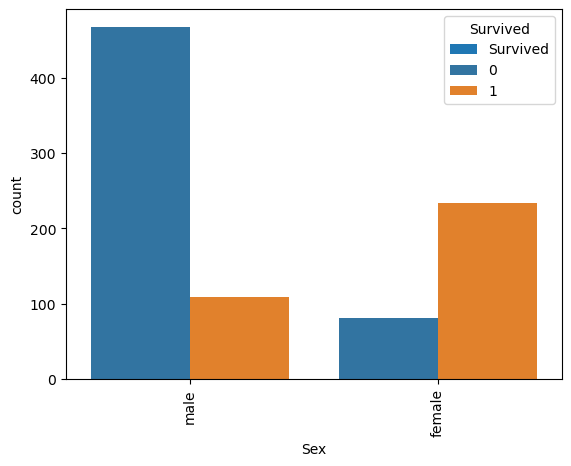

In [331]:
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot('Sex',hue='Survived',data=data,)
plt.show()

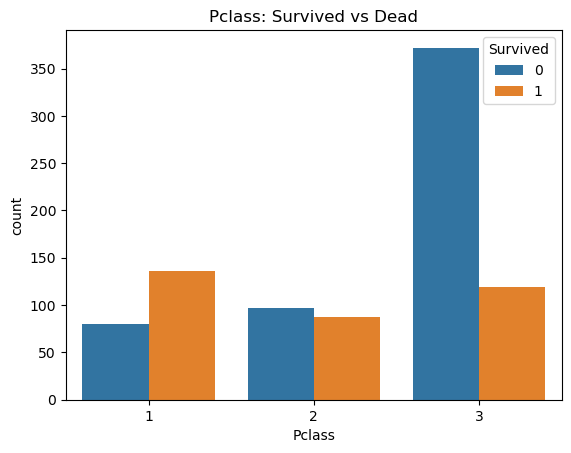

In [332]:
sns.countplot('Pclass', hue='Survived', data=data)
plt.title('Pclass: Survived vs Dead')
plt.show()

In [333]:
# class 1 are given high priority in rescue mission,passenger are more in
# class 3 only 1/4 of the class 3 passenger are surived


In [334]:
print('Oldest person Survived was of:',data['Age'].max())
print('Youngest person Survived was of:',data['Age'].min())
print('Average person Survived was of:',data['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


In [335]:
 # extracting Name initials, and to find the avergae of age group, average
 # is calucalted to fill na value in age features

In [336]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
   

In [337]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [338]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [339]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [340]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'),'Age']=46

In [341]:
data.Age.isnull().any()

False

In [342]:
# null values in age feature is cleared

In [343]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [344]:
data1=data.drop(['Cabin','Embarked', 'Initial','Name','Ticket','Fare','SibSp','Parch','PassengerId'],axis=1)

In [345]:
data1.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [346]:
data1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
dtype: int64

In [347]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1['Sex']=le.fit_transform(data1['Sex'])

In [348]:
data1.head()

,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


In [349]:
# for this assuming only 3 features as independent features Passenger,class,Sex,Age, survived in the dependent feature

In [350]:
y=data1['Survived']
x=data1.drop(['Survived'],axis=1)

In [351]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

## KNN Model

In [352]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,50)


for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    modelknn = classifier.fit(x_train,y_train)
    y_pred = modelknn.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)


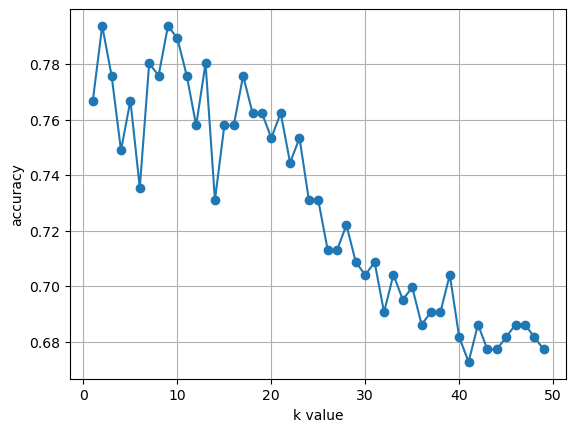

In [353]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [354]:
classifier = KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
modelknn = classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)


In [355]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('f1 score = ',f1_score(y_test,y_pred))

Accuracy =  0.7937219730941704
Precision =  0.7590361445783133
Recall =  0.7078651685393258
f1 score =  0.7325581395348838


### K-fold cross validation

In [356]:
from sklearn.model_selection import KFold

In [357]:
kfold_validator =KFold(10)

In [358]:
from sklearn.model_selection import cross_val_score

In [359]:
cv_score =cross_val_score(modelknn,x,y,cv=kfold_validator)

In [360]:
cv_score

array([0.73333333, 0.75280899, 0.74157303, 0.7752809 , 0.75280899,
       0.7752809 , 0.80898876, 0.75280899, 0.82022472, 0.69662921])

In [361]:
np.mean(cv_score)

0.7609737827715356

### Stratified K-fold Validaion 

In [362]:
from sklearn.model_selection import StratifiedKFold

In [363]:
skfold_validator =StratifiedKFold(n_splits=10)

In [364]:
from sklearn.model_selection import cross_val_score

In [365]:
skcv_score =cross_val_score(modelknn,x,y,cv=skfold_validator)

In [366]:
skcv_score 

array([0.74444444, 0.69662921, 0.69662921, 0.80898876, 0.80898876,
       0.7752809 , 0.80898876, 0.78651685, 0.76404494, 0.73033708])

In [367]:
np.mean(skcv_score)

0.7620848938826468

## SVM Model

### Linear

In [368]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [369]:
y_pred_svm=svmclf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix

In [370]:
print('accuracy=',accuracy_score(y_test,y_pred_svm))

accuracy= 0.7847533632286996


### RFB 

In [371]:
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)

SVC()

y_pred_svm=svmclf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix

In [372]:
print('accuracy=',accuracy_score(y_test,y_pred_svm))

accuracy= 0.7847533632286996


### Polynomial

In [373]:
svmclf=SVC(kernel='poly')
modelsvm=svmclf.fit(x_train,y_train)

In [374]:
y_pred_svm=svmclf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix

In [375]:
print('accuracy=',accuracy_score(y_test,y_pred_svm))

accuracy= 0.6367713004484304


### K-fold cross validation

In [376]:
kfold_validatorsvm =KFold(10)

In [377]:
from sklearn.model_selection import cross_val_score

In [378]:
cv_score =cross_val_score(modelsvm,x,y,cv=kfold_validator)

In [379]:
cv_score

array([0.64444444, 0.78651685, 0.68539326, 0.57303371, 0.66292135,
       0.73033708, 0.65168539, 0.6741573 , 0.71910112, 0.73033708])

In [380]:
np.mean(cv_score)

0.6857927590511861

### Stratified K-fold Validaion 

In [381]:
from sklearn.model_selection import StratifiedKFold

In [382]:
skfold_validatorsvm =StratifiedKFold(n_splits=10)

In [383]:
from sklearn.model_selection import cross_val_score

In [384]:
skcv_scoresvm =cross_val_score(modelsvm,x,y,cv=skfold_validator)

In [385]:
skcv_scoresvm

array([0.68888889, 0.64044944, 0.73033708, 0.6741573 , 0.68539326,
       0.71910112, 0.69662921, 0.66292135, 0.68539326, 0.70786517])

In [386]:
np.mean(skcv_score)

0.7620848938826468